## Dataset 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil
import math;
from matplotlib.pyplot import imshow

In [98]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab/Softcomputing/Dataset_2/verification_train.csv");
print(train_df.head());

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      2       0       0       0  ...         0         0         0         0
1      9       0       0       0  ...         0         0         0         0
2      6       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [99]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab/Softcomputing/Dataset_2/verification_test.csv");
print(test_df.head());

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...        31         0         0         0
3      2       0       0       0  ...       222        56         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


label: 5
784
Dimension: 28


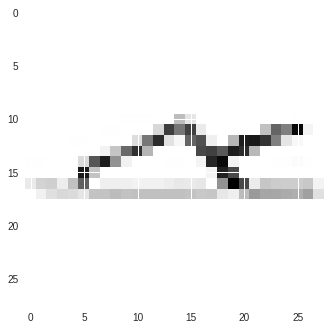

In [100]:
i = 7   # set any valid index of an image

label = train_df.values[i][0]  # retrieve label from first colum in dataframe
print("label:",label)

im_buf = train_df.values[i][1:]  # create flat array of only the pixels of the given image
print(len(im_buf)); 

axis_len = int(math.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
print("Dimension:",axis_len);

im_array = np.int8(np.reshape(im_buf, (axis_len, axis_len))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L')  # convert to a PIL.Image object ('L' is for grayscale)
imshow(np.asarray(img))

In [76]:
train_df['pixel12'] = train_df['pixel12'] / 255;

## data label from dataset 2

In [77]:
test_label=test_df['label']

train_label=train_df['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)
print(all_labels);

0        0
1        1
2        2
3        2
4        3
        ..
69995    9
69996    1
69997    8
69998    8
69999    7
Name: label, Length: 70000, dtype: int64


## image pixels for dataset 2

In [78]:
data_name=[test_df,train_df]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)
print(all_image.shape)
print(all_image);

(70000, 784)
       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...        31         0         0         0
3           0       0       0       0  ...       222        56         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995       0       0       0       0  ...         0         0         0         0
69996       0       0       0       0  ...         0         0         0         0
69997       0       0       0       0  ...         0         0         0         0
69998       0       0       0       0  ...         0         0         0         0
69999       0       0       0       0  ...         0         0         0  

## normalize

In [79]:
all_image=all_image/255.0

## reshape image

In [80]:
all_image=all_image.values.reshape(-1,28,28,1)

##  print images

0


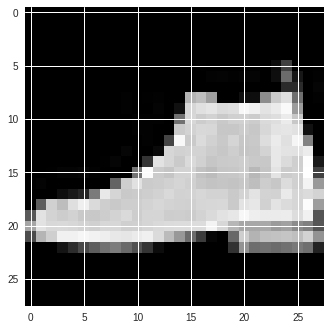

In [81]:
show_img = all_image[100].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(all_labels[0])

## train test split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

## zipped

In [83]:
train_dataset_zipped = list(zip(X_train,y_train))
test_dataset_zipped = list(zip(X_test,y_test))
print(len(train_dataset_zipped))
print(len(test_dataset_zipped))


56000
14000


## Experiment 1 for Dataset 2:

In [84]:
batch_size = 20;
num_iters = 20000;
input_dim = 28*28; #num_features = 784
output_dim = 10;
learning_rate = 0.01;
num_nodes_in_hidden_layers = 200;
num_hidden_layers = 6;
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

cuda:0


In [85]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print(len(train_loader));
print(len(test_loader));

2800
700


In [86]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
         
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_6 = nn.ReLU()
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

## INSTANTIATE MODEL CLASS

In [87]:

 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

## INSTANTIATE LOSS & OPTIMIZER CLASS

In [88]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train model

In [89]:
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3054049015045166. Accuracy: 10.15
Iteration: 1000. Loss: 2.3075602054595947. Accuracy: 9.714285714285714
Iteration: 1500. Loss: 2.295961856842041. Accuracy: 12.364285714285714
Iteration: 2000. Loss: 2.2951200008392334. Accuracy: 9.557142857142857
Iteration: 2500. Loss: 2.2908053398132324. Accuracy: 26.392857142857142
Iteration: 3000. Loss: 2.235339403152466. Accuracy: 19.314285714285713
Iteration: 3500. Loss: 1.7535679340362549. Accuracy: 22.57857142857143
Iteration: 4000. Loss: 1.26744544506073. Accuracy: 52.885714285714286
Iteration: 4500. Loss: 0.8967034220695496. Accuracy: 57.72857142857143
Iteration: 5000. Loss: 0.9525443315505981. Accuracy: 63.642857142857146
Iteration: 5500. Loss: 1.0470128059387207. Accuracy: 65.75714285714285
Iteration: 6000. Loss: 0.6968270540237427. Accuracy: 66.63571428571429
Iteration: 6500. Loss: 0.5516088008880615. Accuracy: 67.44285714285714
Iteration: 7000. Loss: 0.6965080499649048. Accuracy: 73.83571428571429
Iteration: 7500. L

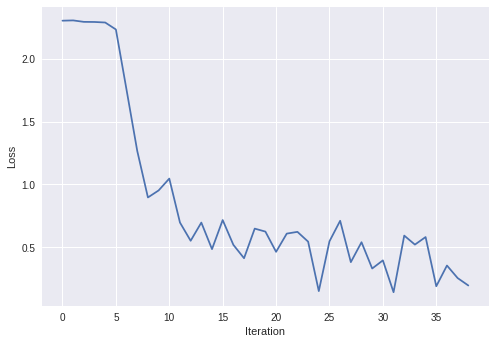

In [90]:
plt.plot(Iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

## Modified parameter for experiment 2

In [91]:
batch_size = 200
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.001 

num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)
print("Total Epoch:",num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device);

Total Epoch: 71
cuda:0


## dataloader

In [92]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 
print("Train dataloader:",len(train_loader));
print("Test dataloader:",len(test_loader));

Train dataloader: 280
Test dataloader: 70


In [93]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.celu_1 = nn.CELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.celu_2 = nn.CELU()
        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.celu_3 = nn.CELU()
        
        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.celu_4 = nn.CELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.celu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.celu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.celu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [94]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_nodes_in_hidden_layers)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (celu_1): CELU(alpha=1.0)
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (celu_2): CELU(alpha=1.0)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (celu_3): CELU(alpha=1.0)
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (celu_4): CELU(alpha=1.0)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [95]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [96]:
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.4451512396335602. Accuracy: 85.70714285714286
Iteration: 1000. Loss: 0.41375645995140076. Accuracy: 86.67142857142858
Iteration: 1500. Loss: 0.3306722640991211. Accuracy: 87.65714285714286
Iteration: 2000. Loss: 0.27092036604881287. Accuracy: 87.82142857142857
Iteration: 2500. Loss: 0.2779959440231323. Accuracy: 88.32857142857142
Iteration: 3000. Loss: 0.36200129985809326. Accuracy: 88.29285714285714
Iteration: 3500. Loss: 0.25964534282684326. Accuracy: 88.67857142857143
Iteration: 4000. Loss: 0.24770797789096832. Accuracy: 88.42857142857143
Iteration: 4500. Loss: 0.13842198252677917. Accuracy: 88.56428571428572
Iteration: 5000. Loss: 0.17704877257347107. Accuracy: 89.37142857142857
Iteration: 5500. Loss: 0.16393893957138062. Accuracy: 88.99285714285715
Iteration: 6000. Loss: 0.1298397034406662. Accuracy: 89.63571428571429
Iteration: 6500. Loss: 0.15400223433971405. Accuracy: 89.73571428571428
Iteration: 7000. Loss: 0.19660376012325287. Accuracy: 89.5
Iteration:

## loss vs iterations

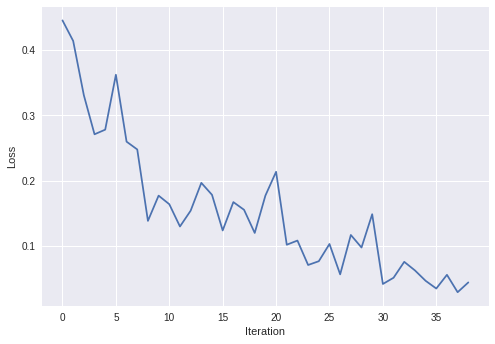

In [97]:
plt.plot(Iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()